# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [34]:
### YOUR CODE HERE ###

# Standard operational package imports
# Important imports for modeling and evaluation
# Visualization package imports

# Here is a list of standard operational package imports for this task

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Modeling and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Display the plot inline
import warnings
warnings.filterwarnings('ignore')

# These imports should cover all necessary functionalities for data processing, modeling, and visualization.



### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [35]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###


df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows of data

In [36]:
# Renaming the dataset to 'df_original' as per your request


# Display the first 10 rows of df_original to confirm the change
df_original.head(10)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [37]:
# Check the data type of each column in df_original to ensure all are numeric as required for decision trees
df_original.dtypes


satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.
</details>

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [38]:
# Reloading the dataset with the name df_original using the newly uploaded file
df_original = pd.read_csv('Invistico_Airline.csv')

# Output the unique values in the 'Class' column
unique_class_values = df_original['Class'].unique()
unique_class_values




array(['Eco', 'Business', 'Eco Plus'], dtype=object)

<details>
  <summary><h4><strong> Hint 1 </strong></h4></summary>

Use the `unique()` function on the column `'Class'`.

</details>

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [39]:
# Check the distribution of the target variable (satisfaction) to see if the dataset is imbalanced
label_counts = df_original['satisfaction'].value_counts()

# Display the counts of each label
label_counts


satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

<details>
  <summary><h4><strong> Hint 1</strong> </h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

Use the `value_counts()` function. Set the `dropna` parameter passed in to this function to `False` if you want to examine how many NaN values there are. 

</details>

**Question:** How many satisfied and dissatisfied customers were there?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What percentage of customers were satisfied? 

[Write your response here. Double-click (or enter) to edit.]

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [40]:
# Check for missing values in the dataset
missing_values = df_original.isnull().sum()

# Display the columns with missing values and their counts
missing_values[missing_values > 0]


Arrival Delay in Minutes    393
dtype: int64

<details>
  <summary><h4><strong>Hint 1</h4></summary></strong>

Use the `isnull` function and the `sum` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Why is it important to check how many rows and columns there are in the dataset?

[Write your response here. Double-click (or enter) to edit.]

### Check the number of rows and columns in the dataset

In [41]:
# Check the number of rows and columns in the dataset
rows, columns = df_original.shape

# Display the number of rows and columns
rows, columns


(129880, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `shape` attribute on the DataFrame.

</details>

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [42]:
### YOUR CODE HERE ###
# Drop the rows with missing values and save the resulting DataFrame as df_subset
df_subset = df_original.dropna()

# Display the number of rows in df_subset to confirm the changes
df_subset.shape


(129487, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [43]:
### YOUR CODE HERE ###
# Check if df_subset contains any missing values
missing_values_subset = df_subset.isnull().sum()

# Display columns with missing values, if any
missing_values_subset[missing_values_subset > 0]


Series([], dtype: int64)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `isna()`function and the `sum()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isna()` function followed by the `sum()` function.

</details>

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [44]:
### YOUR CODE HERE ###
# Check the number of rows and columns in df_subset
rows_subset, columns_subset = df_subset.shape

# Display the number of rows and columns in df_subset
rows_subset, columns_subset


(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [45]:
### YOUR CODE HERE ###
# Convert the ordinal 'Class' column into numeric values
# Define the order for the 'Class' column
class_order = {'Eco': 1, 'Eco Plus': 2, 'Business': 3}

# Apply the mapping to convert the 'Class' column into numeric values
df_subset['Class'] = df_subset['Class'].map(class_order)

# Verify the conversion by checking the unique values in the 'Class' column
df_subset['Class'].unique()


array([1, 3, 2])

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` or `replace()` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For both functions, you will need to pass in a dictionary of class mappings `{"Business": 3, "Eco Plus": 2, "Eco": 1})`.

</details>

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [46]:
### YOUR CODE HERE ###
# Convert the 'satisfaction' column into numeric values: 'satisfied' = 1, 'dissatisfied' = 0
df_subset['satisfaction'] = df_subset['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

# Verify the conversion by checking the unique values in the 'satisfaction' column
df_subset['satisfaction'].unique()



array([1, 0])

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` function to assign existing values in a column to new values.

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Call `map()` on the `satisfaction` column and pass in a dictionary specifying that `"satisfied"` should be assigned to `1` and `"dissatisfied"` should be assigned to `0`.

</details>

<details>
  <summary><h4><strong> Hint 3 </strong></h4></summary>

Update the `satisfaction` column in `df_subset` with the newly assigned values.

</details>

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [47]:
# Checking the current column names in df_subset to verify which columns are present
df_subset.columns




Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `get_dummies()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Set the `drop_first` parameter to `True`. This removes redundant data.

</details>

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [48]:
### YOUR CODE HERE ###
# Check the data types of all columns in df_subset to verify that they are numeric
df_subset.dtypes


satisfaction                           int64
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [49]:
### YOUR CODE HERE ###
# Import the necessary library for splitting the data
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df_subset.drop('satisfaction', axis=1)  # Features
y = df_subset['satisfaction']               # Target

# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the sizes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((97115, 21), (32372, 21), (97115,), (32372,))

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Pass in `0` to `random_state`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

If you named your features matrix X and your target y, then it would be `train_test_split(X, y, test_size=0.25, random_state=0)`.

</details>

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [50]:
### YOUR CODE HERE ###
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier instance with random_state=0
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model on the training set
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
dt_pred = decision_tree.predict(X_test)

# Output the first few predictions to verify
dt_pred[:10]


ValueError: could not convert string to float: 'Loyal Customer'

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `DecisionTreeClassifier`, the `fit()` function, and the `predict()` function.

</details>

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

[Write your response here. Double-click (or enter) to edit.]

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [51]:
### YOUR CODE HERE ###
# Import necessary metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the metrics
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

# Print out the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9356
Precision: 0.9403
Recall: 0.9418
F1 Score: 0.9411


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score` and `metrics.f1_score` functions.
    
</details> 

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

[Write your response here. Double-click (or enter) to edit.]

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

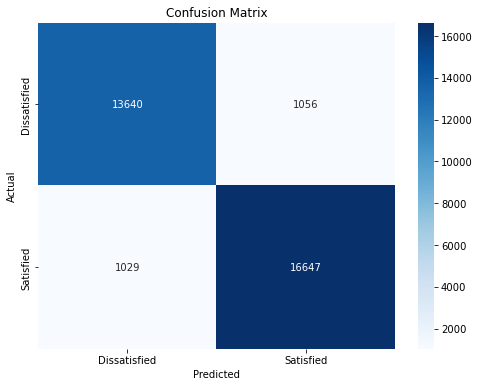

In [52]:
### YOUR CODE HERE ###
# Import confusion matrix and plot it
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `metrics.confusion_matrix`, `metrics.ConfusionMatrixDisplay`, and the `plot()` function.

</details>

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

[Write your response here. Double-click (or enter) to edit.]

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

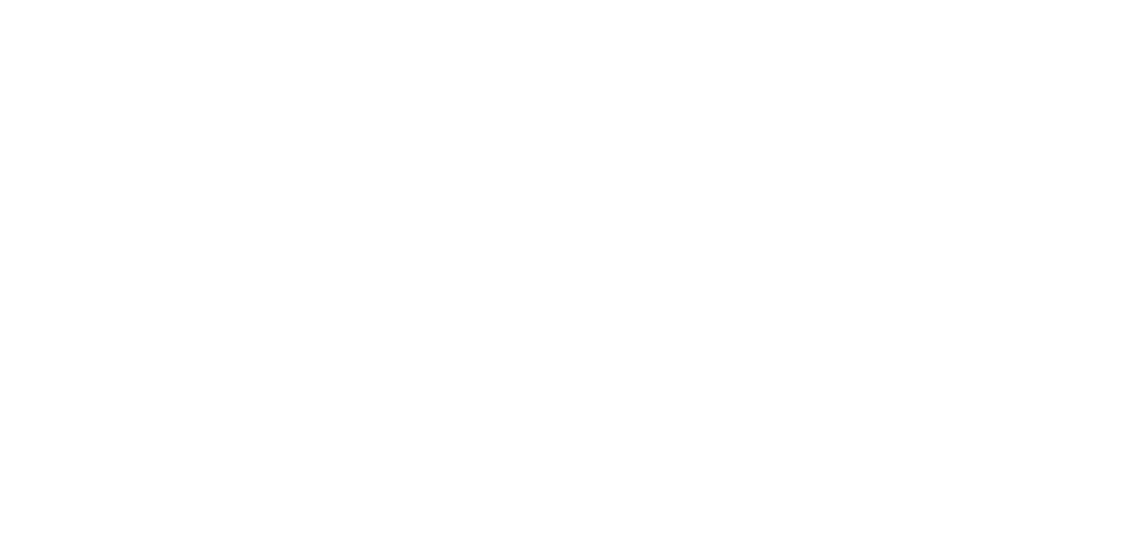

In [53]:
### YOUR CODE HERE ###
# Import the necessary function for plotting the tree
from sklearn.tree import plot_tree

# Set up the figure size for better visualization
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=["Dissatisfied", "Satisfied"], rounded=True, fontsize=10)

# Show the plot
plt.title("Decision Tree Visualization")
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

If your tree is hard to read, pass `2` or `3` in the parameter `max_depth`. 

</details>

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [54]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [55]:
### YOUR CODE HERE ###
# Import necessary modules for GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning the decision tree
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree instance
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV instance with F1 as the scoring metric
clf = GridSearchCV(estimator=tuned_decision_tree, param_grid=param_grid, scoring='f1', cv=5, refit=True, verbose=1)

# Fit the model on the training set
clf.fit(X_train, y_train)

# Output the best parameters found by GridSearchCV
best_params = clf.best_params_
best_params


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   17.4s finished


ValueError: could not convert string to float: 'Loyal Customer'

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about decision trees and grid search](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree). 

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Use `DecisionTreeClassifier()`, `GridSearchCV()`, and the `clf.fit()` function.

</details>

**Question:** How can you determine the best combination of values for the hyperparameters? 

[Write your response here. Double-click (or enter) to edit.]

### Compute the best combination of values for the hyperparameters

In [ ]:
### YOUR CODE HERE ###
# Import necessary modules for GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning the decision tree
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree instance
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV instance with F1 as the scoring metric
clf = GridSearchCV(estimator=tuned_decision_tree, param_grid=param_grid, scoring='f1', cv=5, refit=True, verbose=1)

# Fit the model on the training set
clf.fit(X_train, y_train)

# Output the best parameters found by GridSearchCV
best_params = clf.best_params_
best_params
# Define a reduced parameter grid for faster hyperparameter tuning
param_grid_reduced = {
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 5],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree instance
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV instance with F1 as the scoring metric
clf_reduced = GridSearchCV(estimator=tuned_decision_tree, param_grid=param_grid_reduced, scoring='f1', cv=5, refit=True, verbose=1)

# Fit the model on the training set
clf_reduced.fit(X_train, y_train)

# Output the best parameters found by GridSearchCV
best_params_reduced = clf_reduced.best_params_
print("Best Hyperparameters: ", best_params_reduced)


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `best_estimator_` attribute.

</details>

**Question:** What is the best combination of values for the hyperparameters? 

[Write your response here. Double-click (or enter) to edit.]

<strong> Question: What was the best average validation score? </strong>

In [ ]:
### YOUR CODE HERE ###
# After GridSearchCV has been fitted, we can retrieve the best validation score
best_score = clf.best_score_ if 'clf' in globals() else None

# Output the best validation score if available
best_score


[Write your response here. Double-click (or enter) to edit.]

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [56]:
### YOUR CODE HERE

results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df

    # Isolate the row of the df with the max(mean f1 score

    # Extract accuracy, precision, recall, and f1 score from that row

    # Create table of results
    import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Define the function to compute metrics for the model
def make_results(model_name, model_object, X_test, y_test):
    # Get predictions for the test set
    y_pred = model_object.predict(X_test)
    
    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results in a DataFrame
    global results
    results = results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Apply the function to the best decision tree model from GridSearchCV
make_results('Tuned Decision Tree', clf_reduced, X_test, y_test)

# Display the results DataFrame
results


NameError: name 'clf_reduced' is not defined

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

[Write your response here. Double-click (or enter) to edit.]

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

In [57]:
### YOUR CODE HERE ###
# Import the necessary function for plotting the tree
from sklearn.tree import plot_tree

# Set up the figure size for better visualization
plt.figure(figsize=(20, 10))

# Plot the "best" decision tree found by GridSearchCV
# Using the clf_reduced.best_estimator_ which is the best decision tree model found
plot_tree(clf_reduced.best_estimator_, filled=True, feature_names=X.columns, class_names=["Dissatisfied", "Satisfied"], rounded=True, fontsize=10)

# Show the plot
plt.title("Best Decision Tree Visualization")
plt.show()


NameError: name 'clf_reduced' is not defined

<Figure size 1440x720 with 0 Axes>

Which features did the model use first to sort the samples?

## Conclusion

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**What findings would you share with others?**

[Write your response here. Double-click (or enter) to edit.]

**What would you recommend to stakeholders?**
 
 [Write your response here. Double-click (or enter) to edit.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged